# Loading Dependencis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # for plotting
import joblib # for model saving/loading

# ML Tools
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold

# ML Classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Loading Data

In [2]:
# Loading Dataset
df = pd.read_csv("gender_data.csv")
df.sample(5)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
62,Cool,Rock,Doesn't drink,Other,M
76,Warm,Jazz/Blues,Vodka,Coca Cola/Pepsi,M
25,Cool,Pop,Doesn't drink,7UP/Sprite,F
40,Warm,Rock,Other,Coca Cola/Pepsi,F
22,Cool,Pop,Wine,7UP/Sprite,F


In [3]:
# Splitting into data and target
data = df.drop("Gender", axis=1)
target = df.Gender

# Exploratory Data Analysis

In [4]:
# Checking info about df
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,86,86,86,86,86
unique,3,7,6,4,2
top,Cool,Rock,Beer,Coca Cola/Pepsi,F
freq,47,22,17,40,43


In [5]:
# Checking if thre are any missing values
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [6]:
# Checking Dtypes of features
df.dtypes

Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object

In [7]:
# Checking equality of target class
df['Gender'].value_counts()

F    43
M    43
Name: Gender, dtype: int64

In [8]:
# Transforming categorical features to numerical
encoded = OrdinalEncoder().fit_transform(df)
df_encoded = pd.DataFrame(encoded, columns=df.columns)
df_encoded.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0.0,6.0,3.0,0.0,0.0
1,1.0,2.0,3.0,1.0,0.0
2,2.0,6.0,5.0,1.0,0.0
3,2.0,1.0,4.0,2.0,0.0
4,0.0,6.0,5.0,1.0,0.0


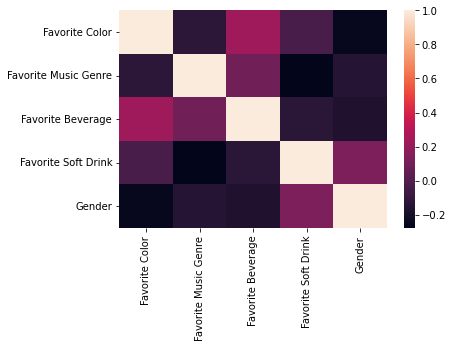

In [9]:
# Checking correlation of features
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix);

In [10]:
# Splitting data into X and y
X = df_encoded.drop("Gender", axis=1)
y = df_encoded.Gender
X.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,0.0,6.0,3.0,0.0
1,1.0,2.0,3.0,1.0
2,2.0,6.0,5.0,1.0
3,2.0,1.0,4.0,2.0
4,0.0,6.0,5.0,1.0


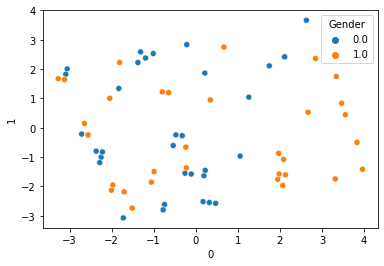

In [11]:
# Displaying data in 2d
from sklearn.decomposition import PCA
scaled_X = pd.DataFrame(PCA(2).fit_transform(X))

sns.scatterplot(x=0, y=1, hue=y, data=scaled_X);

# Searching for Best Model

In [12]:
# Dictionary for model/parameter search
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10,15,20],
            'kernel': ['rbf','linear','poly','sigmoid'],
            'degree': [2,3]
        }  
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto', penalty="l2"),
        'params': {
            'C': [1,5,10]
        }
    },
    'LDA' : {
        'model': LinearDiscriminantAnalysis(),
        'params': {
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': list(range(5,12)),
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'naive_bayes' : {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': [1e-8,1e-9,1e-10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ["gini", "entropy"],
            'splitter': ["best", "random"]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,4,5,10,15,45]
        }
    },
    'gradient_boosting_cls': {
        'model': GradientBoostingClassifier(),
        'params': {
            'loss': ["deviance"],
            'subsample': [0.4, 0.1],
            'min_samples_split': [2,4],
            'min_samples_leaf': [2,4],
            'min_weight_fraction_leaf': [0, 0.01],
            'max_depth': [3,5],
        }
    }
}

In [13]:
# Model search
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=RepeatedKFold(n_splits=5, n_repeats=10), return_train_score=False, error_score='raise')
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    print(f"{model_name} has ended compiling")
    
df_models = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print("\n--------------- GRID SEARCH RESULTS ---------------")
df_models

svm has ended compiling
logistic_regression has ended compiling
LDA has ended compiling
KNN has ended compiling
naive_bayes has ended compiling
decision_tree has ended compiling
random_forest has ended compiling
gradient_boosting_cls has ended compiling

--------------- GRID SEARCH RESULTS ---------------


,model,best_score,best_params
0,svm,0.713987,"{'C': 5, 'degree': 2, 'kernel': 'rbf'}"
1,logistic_regression,0.563268,{'C': 1}
2,LDA,0.545948,{}
3,KNN,0.714314,"{'n_neighbors': 11, 'p': 1, 'weights': 'distan..."
4,naive_bayes,0.544118,{'var_smoothing': 1e-08}
5,decision_tree,0.682941,"{'criterion': 'entropy', 'splitter': 'best'}"
6,random_forest,0.705948,{'n_estimators': 45}
7,gradient_boosting_cls,0.736797,"{'loss': 'deviance', 'max_depth': 5, 'min_samp..."


# Creating Best Model

In [14]:
# Getting best parameters from model with highest score
best_parameters = df_models.loc[df_models['best_score'].idxmax()]['best_params']
best_parameters

{'loss': 'deviance',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'subsample': 0.4}

In [15]:
# Creating pipeline
pipe = Pipeline([
    ("ordinal_encoder", OrdinalEncoder()),
    ('gbcls', GradientBoostingClassifier(**best_parameters))
])

pipe

Pipeline(steps=[('ordinal_encoder', OrdinalEncoder()),
                ('gbcls',
                 GradientBoostingClassifier(max_depth=5, min_samples_leaf=2,
                                            min_weight_fraction_leaf=0,
                                            subsample=0.4))])

In [16]:
# Training model on whole dataset
pipe.fit(data, target)

Pipeline(steps=[('ordinal_encoder', OrdinalEncoder()),
                ('gbcls',
                 GradientBoostingClassifier(max_depth=5, min_samples_leaf=2,
                                            min_weight_fraction_leaf=0,
                                            subsample=0.4))])

In [17]:
# Saving pipeline
joblib.dump(pipe, 'cls-models/sklearn-gender-cls.pkl', compress=1)

['cls-models/sklearn-gender-cls.pkl']

# Testing Pipeline

In [18]:
# Lists of all posible feature options
print("-------- ALL POSIBLE OPTIONS --------")
print("Favorite Color:", df["Favorite Color"].unique())
print("Favorite Music Genre:",df["Favorite Music Genre"].unique())
print("Favorite Beverage:",df["Favorite Beverage"].unique())
print("Favorite Soft Drink:",df["Favorite Soft Drink"].unique())

-------- ALL POSIBLE OPTIONS --------
Favorite Color: ['Cool' 'Neutral' 'Warm']
Favorite Music Genre: ['Rock' 'Hip hop' 'Folk/Traditional' 'R&B and soul' 'Jazz/Blues' 'Pop'
 'Electronic']
Favorite Beverage: ['Vodka' 'Wine' 'Whiskey' 'Beer' "Doesn't drink" 'Other']
Favorite Soft Drink: ['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']


In [19]:
# Input your features
user_features = {
    "Favorite Color": "Cool",
    "Favorite Music Genre": "Rock",
    "Favorite Beverage": "Doesn't drink",
    "Favorite Soft Drink": 'Coca Cola/Pepsi'
}

df_user = pd.DataFrame(user_features, columns=data.columns, index=[0])
df_user

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,Cool,Rock,Doesn't drink,Coca Cola/Pepsi


In [20]:
# Loading pipeline
gender_cls = joblib.load('cls-models/sklearn-gender-cls.pkl')

# Predicting what gender I am
gender = gender_cls.predict(df_user)[0]

print("YOU ARE", "\033[94mMALE!" if gender == 'M' else "\033[95mFEMALE!")

YOU ARE MALE!


I tried reducting number of features or scaling. It did not increase accuracy.